In [1]:
import numpy as np
import sympy as smp
import matplotlib.pyplot as plt 
from scipy.integrate import odeint
from matplotlib import animation 
from matplotlib.animation import PillowWriter


In [2]:
t, m1, m2, k, g, d, l= smp.symbols('t, m_1, m_2, k, g, d, l')

In [3]:
the1, the2 = smp.symbols(r'\theta_1, \theta_2', cls=smp.Function)

the1= the1(t)
the1_d= smp.diff(the1, t)
the1_dd= smp.diff(the1_d, t)

the2= the2(t)
the2_d= smp.diff(the2, t)
the2_dd= smp.diff(the2_d, t)


In [4]:
x1, y1, x2, y2 = smp.symbols('x1, y1, x2, y2', cls= smp.Function)
x1= x1(the1)
y1= y1(the1)
x2= x2(the2)
y2= y2(the2)


In [5]:
#let's define the expression of the cartesian coordinates 
x1= l*smp.sin(the1)
y1= -l*smp.cos(the1)
x2= d+l*smp.sin(the2)
y2= -l*smp.cos(the2)


In [6]:
#let's define the kinetic energy
T = 0.5*m1*(smp.diff(x1, t)**2+smp.diff(y1, t)**2)+0.5*m2*(smp.diff(x2, t)**2+smp.diff(y2, t)**2)
T.simplify()

#let's define the gravitational potential energy
Ug=m1*g*y1+m2*g*y2
Ug.simplify()

#let's define the elastic energy
Up=0.5*k*((x2-x1)**2+(y2-y1)**2)
Up.simplify()

#the total potential energy is 
U=Ug+Up

#let's define the lagrangian 
L= T-U

In [7]:
#lets define the euler-lagrange equations 
LE1= smp.diff(L, the1)- smp.diff(smp.diff(L,the1_d),t)

LE2= smp.diff(L, the2)- smp.diff(smp.diff(L,the2_d),t)

In [8]:
#let's solve for the second derivative with respect to the angules the1 and the2
sols= smp.solve([LE1, LE2], [the1_dd, the2_dd])

In [9]:
#let's trasform them from smp symbols to np expressions 

dw1dt_f = smp.lambdify((m1, m2, k, g, d, l, the1, the2, the1_d, the2_d), sols[the1_dd])
w1_f= smp.lambdify(the1_d, the1_d)
dw2dt_f = smp.lambdify((m1, m2, k, g, d, l, the1, the2, the1_d, the2_d), sols[the2_dd])
w2_f= smp.lambdify(the2_d, the2_d)


In [10]:
def dSdt(S, t):
    the1, w1, the2, w2 = S
    return[
        w1_f(w1),
        dw1dt_f(m1, m2, k, g, d, l, the1, the2, w1, w2),
        w2_f(w2),
        dw2dt_f(m1, m2, k, g, d, l, the1, the2, w1, w2)
    ]

In [11]:
t = np.linspace(0, 100, 10000)
m1=m2=1
k=0.3
g=1
l=1
d=0.5

In [12]:
#let's define the intial state
#in order: first angle, first angular velocity, second angle, second angular velocity

ans= odeint(dSdt, y0=[0,2,0,0], t=t)
ans.T[0]

array([ 0.        ,  0.02000905,  0.04003054, ..., -1.35665039,
       -1.35288797, -1.34900573])

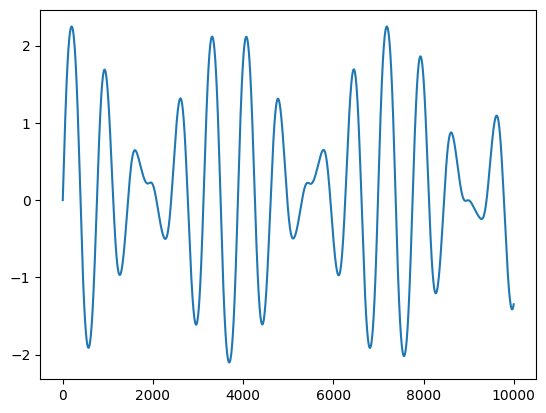

In [13]:
plt.plot(ans.T[0])

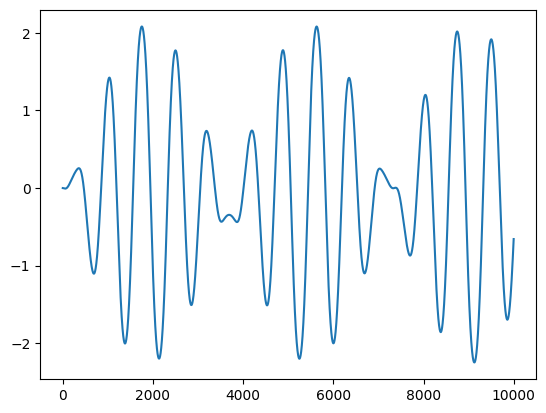

In [14]:
plt.plot(ans.T[2])

In [15]:
def getx1y1x2y2(the1, the2):
    return[
         l*np.sin(the1),
         -l*np.cos(the1),
         d+l*np.sin(the2),
         -l*np.cos(the2)
    ]

In [16]:
x1, y1, x2, y2 = getx1y1x2y2(ans.T[0], ans.T[2])

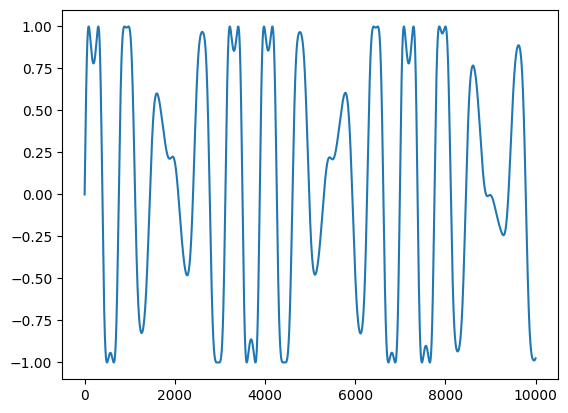

In [17]:
plt.plot(x1)

/tmp/ipykernel_10006/1739910159.py:3: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  dot1.set_data(0, 0)  # First dot at (0, 0)
/tmp/ipykernel_10006/1739910159.py:4: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  dot2.set_data(x1[i], y1[i])  # Second dot
/tmp/ipykernel_10006/1739910159.py:5: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  dot3.set_data(x2[i], y2[i])  # Third dot


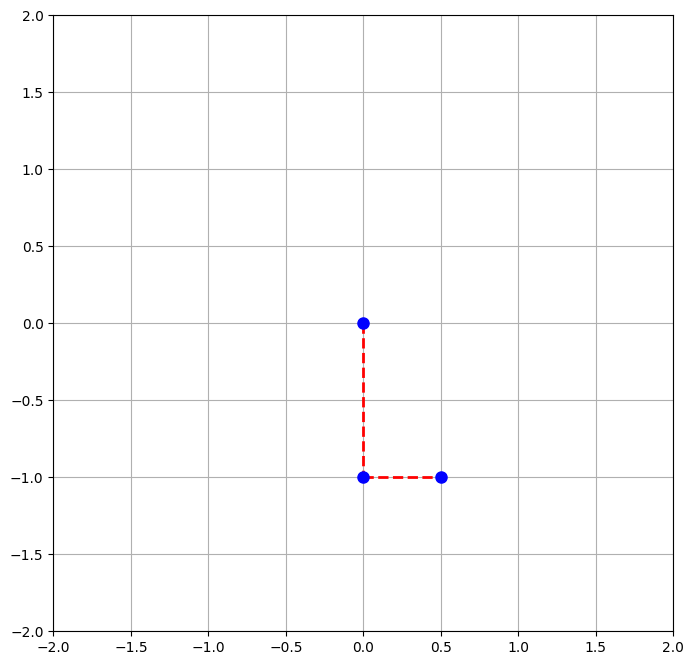

In [18]:
def animate(i):
    
    dot1.set_data(0, 0)  
    dot2.set_data(x1[i], y1[i])  
    dot3.set_data(x2[i], y2[i])  
    
    
    line1.set_data([0, x1[i]], [0, y1[i]])  
    line2.set_data([x1[i], x2[i]], [y1[i], y2[i]])  

# Set up the plot
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.grid()


line1, = plt.plot([], [], 'r--', lw=2)  
line2, = plt.plot([], [], 'r--', lw=2)  


dot1, = plt.plot([], [], 'bo', markersize=8)  
dot2, = plt.plot([], [], 'bo', markersize=8)  
dot3, = plt.plot([], [], 'bo', markersize=8)  


ax.set_ylim(-2, 2)
ax.set_xlim(-2, 2)


ani = animation.FuncAnimation(fig, animate, frames=1000, interval=50)

# Save the animation
ani.save('Double_Springed_Pendulum.gif', writer='pillow', fps=50)